## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —è–∏—Ü –ø–æ –í–ö–û

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [91]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ —è–π—Ü–∞–º.xlsx")
df = df[['–†–µ–≥–∏–æ–Ω', '–ü–µ—Ä–∏–æ–¥', '–Ø–π—Ü–∞', '–û—Å–∞–¥–∫–∏', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞']]
df.sample(10)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –Ø–π—Ü–∞  –û—Å–∞–¥–∫–∏  \
944               –ñ–ê–ú–ë–´–õ–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2017-02    6160.7    64.8   
1651                    –û–ë–õ–ê–°–¢–¨ –ê–ë–ê–ô  2023-06    7328.7    17.8   
2140           –¢–£–†–ö–ï–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2022-06   22877.8     1.5   
365               –ê–¢–´–†–ê–£–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-06    5047.9     0.0   
45               –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2018-10   71926.1    35.3   
508   –í–û–°–¢–û–ß–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2017-05   15568.6    18.0   
1141   –ó–ê–ü–ê–î–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2023-07   14381.0   152.1   
1926            –†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù  2021-03  385357.8     NaN   
1015              –ñ–ê–ú–ë–´–õ–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2023-01    7926.1    26.9   
1065   –ó–ê–ü–ê–î–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2017-03   12327.3    21.2   

      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  
944                   1156432.0    -2.192857  
1651                   735413.0    20.936667  
2140                  1887691.0    29.256667  
365                    259351.0    28.906667  
45                    7742916.0     5.232258  
508                   4087333.0    15.470968  
1141                   952399.0    23.793548  
1926                 43622539.0          NaN  
1015                  1120670.0    -8.522581  
1065                   920817.0    -2.719355

In [92]:
df_vko = df[df['–†–µ–≥–∏–æ–Ω'] == '–í–û–°–¢–û–ß–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_vko = df_vko.drop('–†–µ–≥–∏–æ–Ω', axis = 'columns')
df_vko.head()

–ü–µ—Ä–∏–æ–¥     –Ø–π—Ü–∞  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
480  2015-01   6106.2    29.4                  3420122.0   -10.364516
481  2015-02   7131.1    33.4                  3610458.0    -9.839286
482  2015-03  10886.9    41.2                  3643041.0    -4.858065
483  2015-04  11777.5    50.6                  3735974.0     6.830000
484  2015-05  18897.3    63.8                  3509041.0    14.774194

In [93]:
df_vko = df_vko.rename(columns={'–Ø–π—Ü–∞': '–ö–æ–ª-–≤–æ —è–∏—Ü'})
df_vko.head()

–ü–µ—Ä–∏–æ–¥  –ö–æ–ª-–≤–æ —è–∏—Ü  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
480  2015-01      6106.2    29.4                  3420122.0   -10.364516
481  2015-02      7131.1    33.4                  3610458.0    -9.839286
482  2015-03     10886.9    41.2                  3643041.0    -4.858065
483  2015-04     11777.5    50.6                  3735974.0     6.830000
484  2015-05     18897.3    63.8                  3509041.0    14.774194

In [94]:
df_vko['–ü–µ—Ä–∏–æ–¥'] = pd.to_datetime(df_vko['–ü–µ—Ä–∏–æ–¥'], format='%Y-%m')
df_vko.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 480 to 599
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   –ü–µ—Ä–∏–æ–¥                     120 non-null    datetime64[ns]
 1   –ö–æ–ª-–≤–æ —è–∏—Ü                 120 non-null    float64       
 2   –û—Å–∞–¥–∫–∏                     120 non-null    float64       
 3   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  120 non-null    float64       
 4   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞                120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.6 KB


In [95]:
df_vko.isna().sum()

–ü–µ—Ä–∏–æ–¥                       0
–ö–æ–ª-–≤–æ —è–∏—Ü                   0
–û—Å–∞–¥–∫–∏                       0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è    0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞                  0
dtype: int64

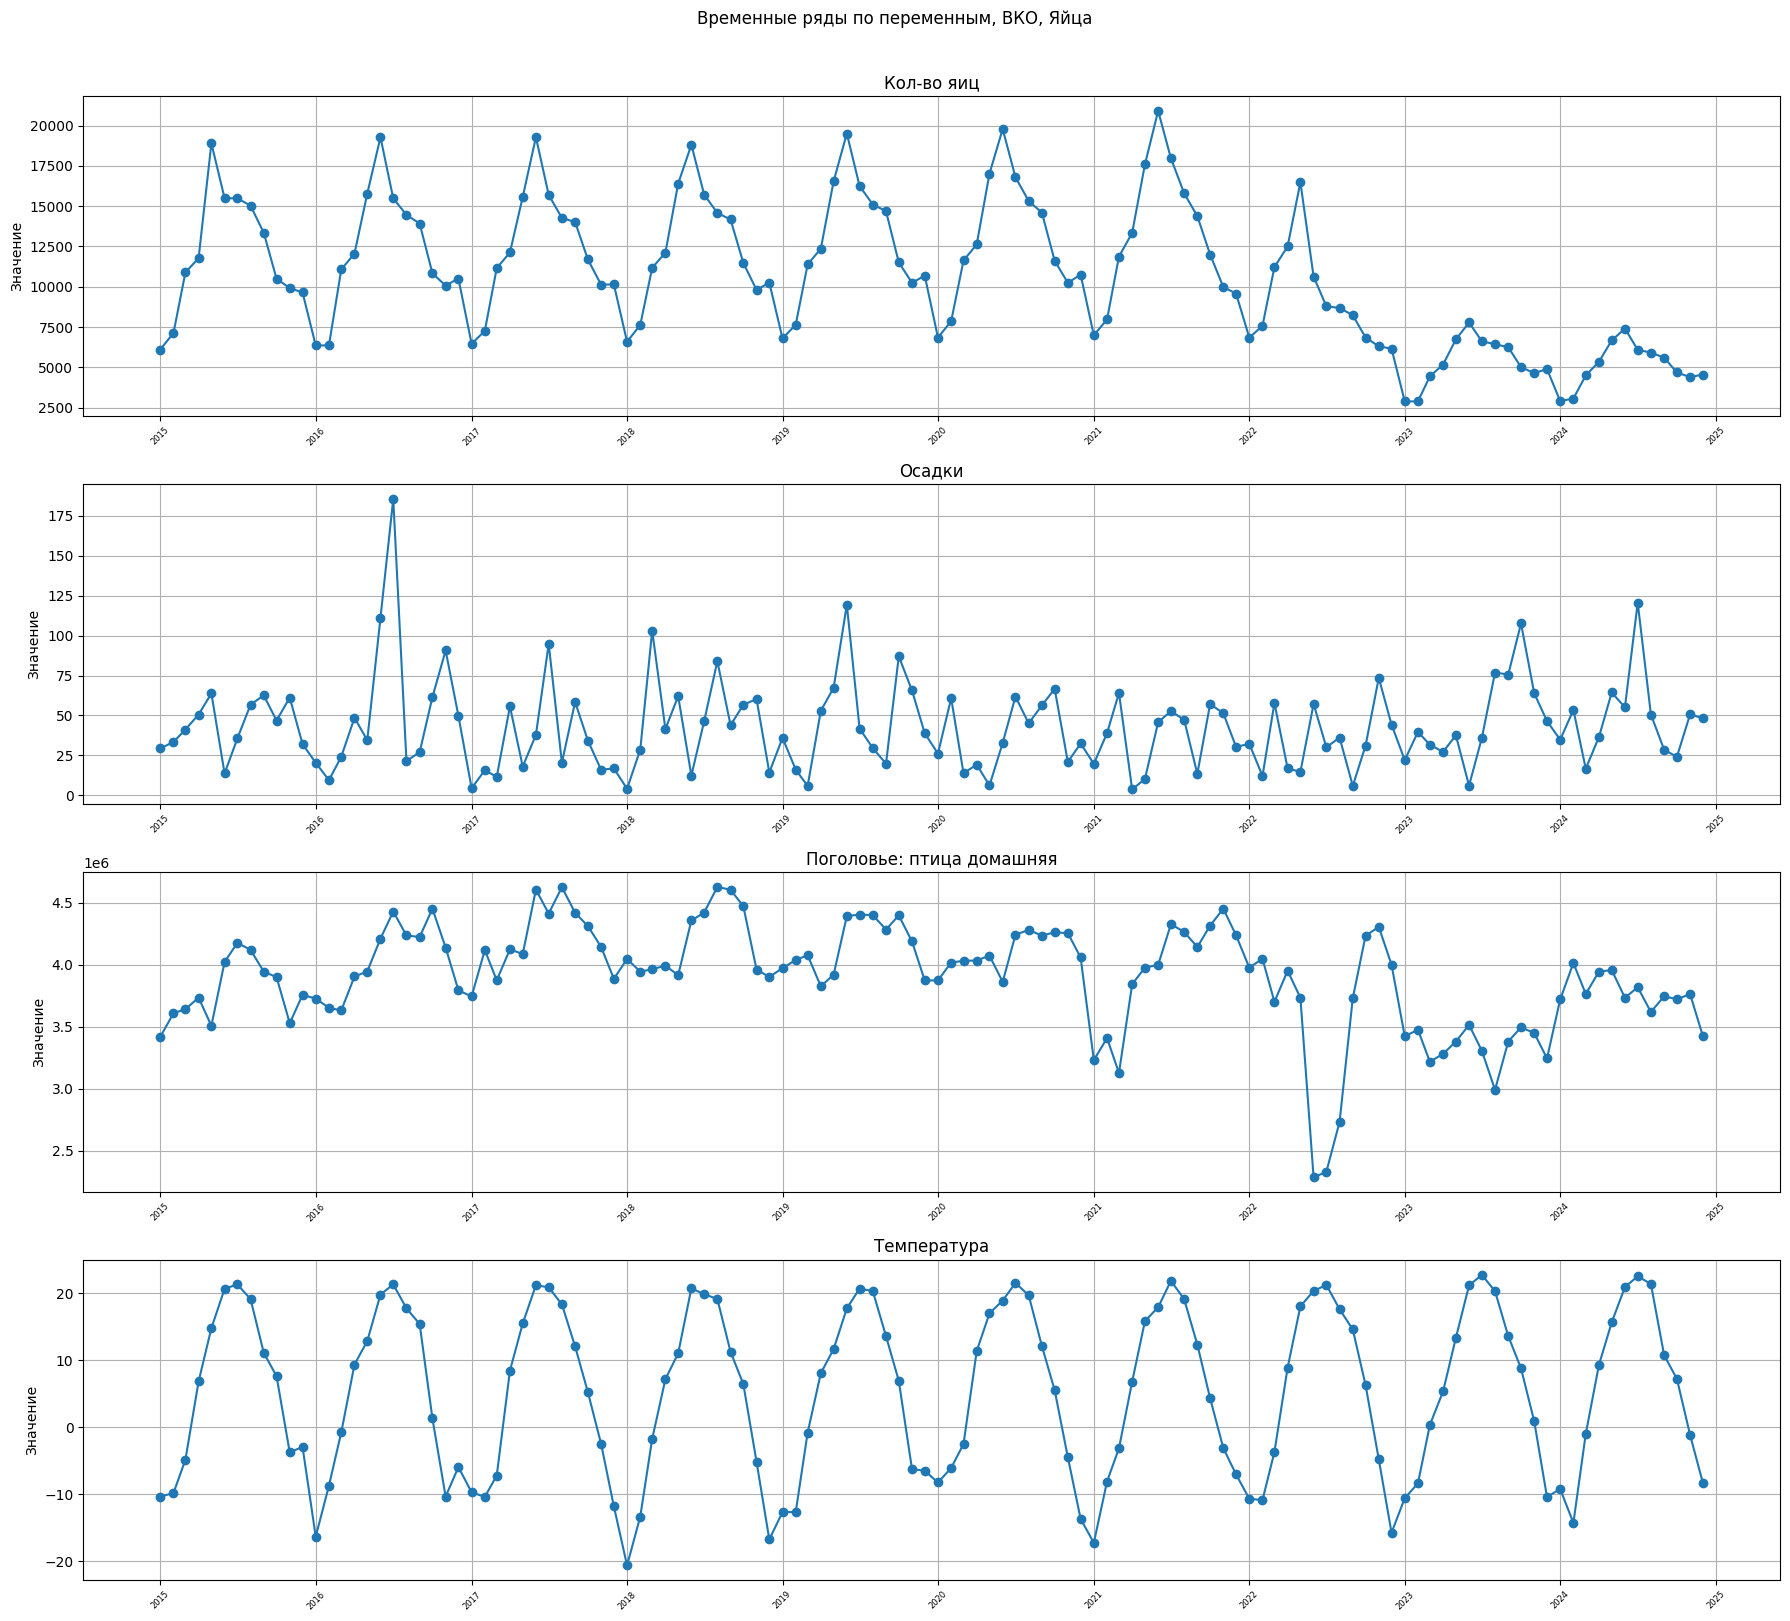

In [96]:
# Plot each variable in its own subplot
value_cols = [col for col in df_vko.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_vko["–ü–µ—Ä–∏–æ–¥"], df_vko[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –í–ö–û, –Ø–π—Ü–∞", y=1.01)
plt.tight_layout()
plt.show()

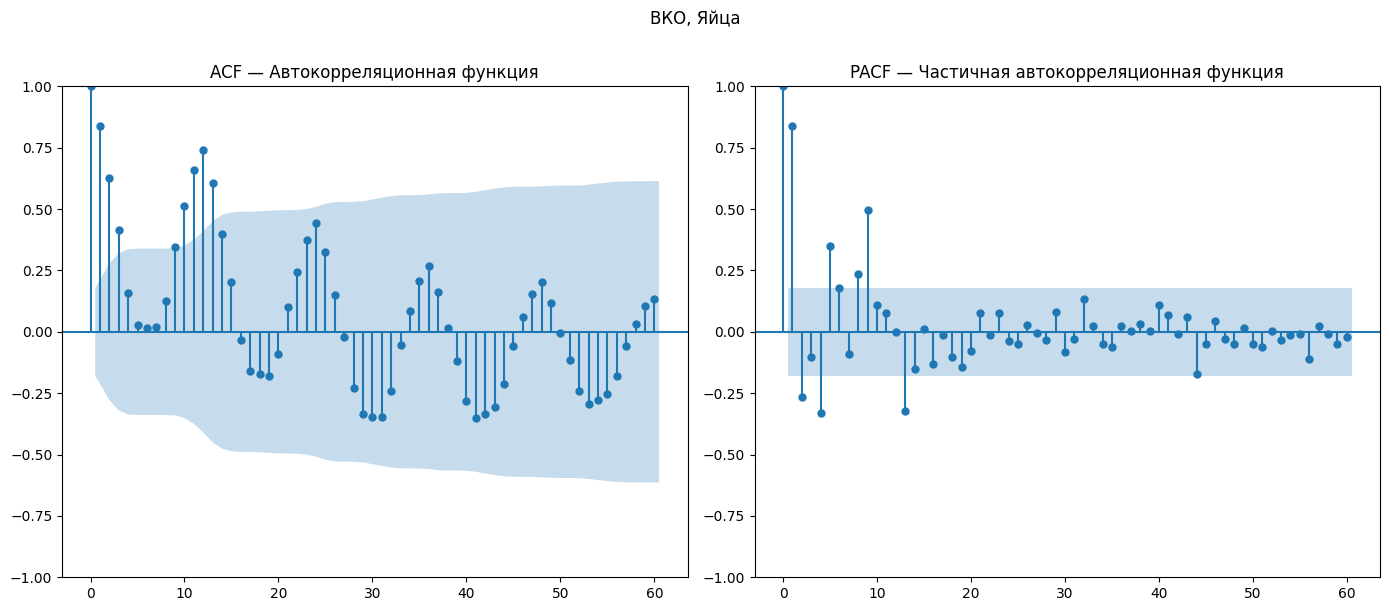

In [97]:
y = df_vko["–ö–æ–ª-–≤–æ —è–∏—Ü"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=60, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=60, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–í–ö–û, –Ø–π—Ü–∞", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **—Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Å–ª–µ–¥—É—é—â–∏—Ö 3 –º–µ—Å—è—Ü–µ–≤** –∏ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫ –Ω–∞ +12 –º–µ—Å—è—Ü–µ–≤). 

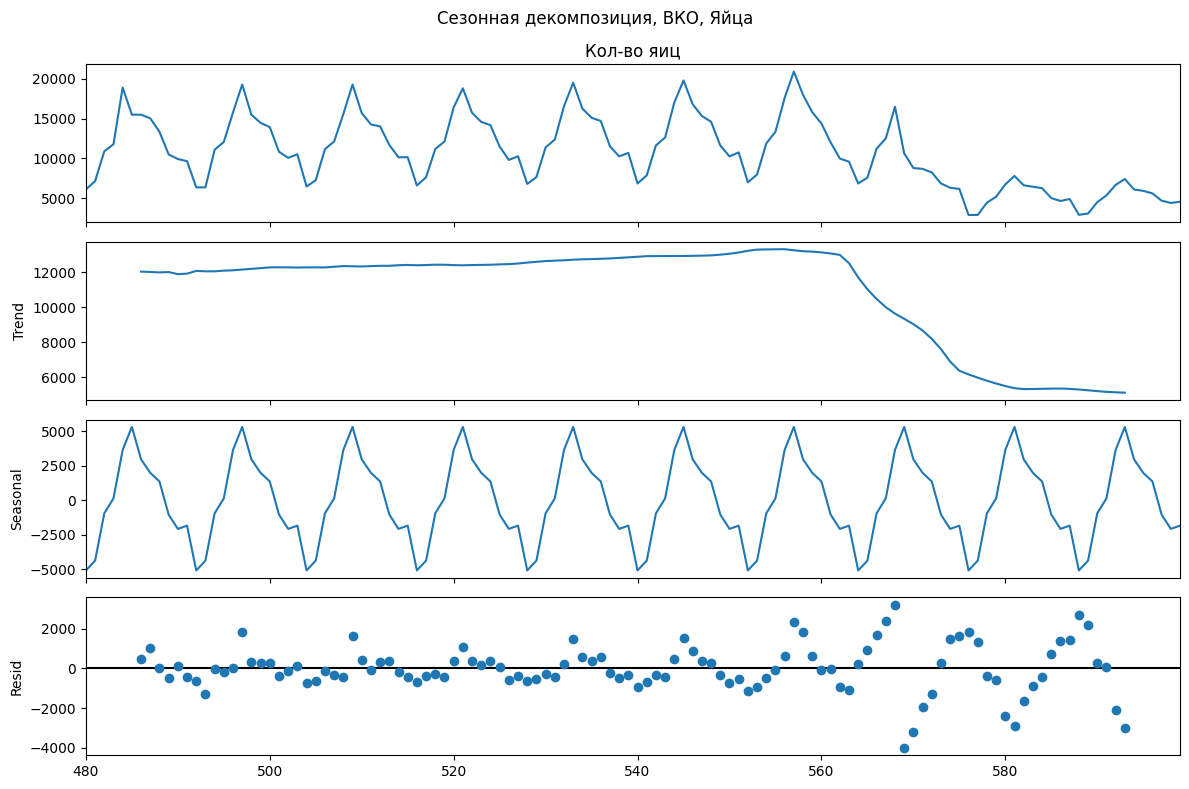

In [98]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_vko["–ö–æ–ª-–≤–æ —è–∏—Ü"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –í–ö–û, –Ø–π—Ü–∞", fontsize=12)
plt.tight_layout()
plt.show()


In [99]:
# Run ADF test
result = adfuller(df_vko["–ö–æ–ª-–≤–æ —è–∏—Ü"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -0.1505
p-value: 0.9442
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [100]:
df_vko

–ü–µ—Ä–∏–æ–¥  –ö–æ–ª-–≤–æ —è–∏—Ü  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
480 2015-01-01      6106.2    29.4                  3420122.0   -10.364516
481 2015-02-01      7131.1    33.4                  3610458.0    -9.839286
482 2015-03-01     10886.9    41.2                  3643041.0    -4.858065
483 2015-04-01     11777.5    50.6                  3735974.0     6.830000
484 2015-05-01     18897.3    63.8                  3509041.0    14.774194
..         ...         ...     ...                        ...          ...
595 2024-08-01      5916.0    50.6                  3620230.0    21.361290
596 2024-09-01      5600.6    28.6                  3747315.0    10.743333
597 2024-10-01      4681.3    24.1                  3723542.0     7.209677
598 2024-11-01      4394.2    50.7                  3764365.0    -1.160000
599 2024-12-01      4553.1    48.3                  3426444.0    -8.322581

[120 rows x 5 columns]

In [101]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–∞–≥–æ–≤ t-1 –¥–æ t-6 –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
for lag in range(1, 7):
    df_vko[f"–Ø–π—Ü–∞_t-{lag}"] = df_vko["–ö–æ–ª-–≤–æ —è–∏—Ü"].shift(lag)
    df_vko[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_vko["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_vko[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_vko["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_vko[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-{lag}"] = df_vko["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è"].shift(lag)

df_vko_full = df_vko[["–ü–µ—Ä–∏–æ–¥", "–ö–æ–ª-–≤–æ —è–∏—Ü", 
                            "–Ø–π—Ü–∞_t-1", "–Ø–π—Ü–∞_t-2", "–Ø–π—Ü–∞_t-3", "–Ø–π—Ü–∞_t-4", "–Ø–π—Ü–∞_t-5", "–Ø–π—Ü–∞_t-6",
                            "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6",
                            "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4", "–û—Å–∞–¥–∫–∏_t-5", "–û—Å–∞–¥–∫–∏_t-6",
                            "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-4", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-5", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-6"]]
df_vko_full

–ü–µ—Ä–∏–æ–¥  –ö–æ–ª-–≤–æ —è–∏—Ü  –Ø–π—Ü–∞_t-1  –Ø–π—Ü–∞_t-2  –Ø–π—Ü–∞_t-3  –Ø–π—Ü–∞_t-4  –Ø–π—Ü–∞_t-5  \
480 2015-01-01      6106.2       NaN       NaN       NaN       NaN       NaN   
481 2015-02-01      7131.1    6106.2       NaN       NaN       NaN       NaN   
482 2015-03-01     10886.9    7131.1    6106.2       NaN       NaN       NaN   
483 2015-04-01     11777.5   10886.9    7131.1    6106.2       NaN       NaN   
484 2015-05-01     18897.3   11777.5   10886.9    7131.1    6106.2       NaN   
..         ...         ...       ...       ...       ...       ...       ...   
595 2024-08-01      5916.0    6088.3    7405.6    6670.2    5347.9    4495.1   
596 2024-09-01      5600.6    5916.0    6088.3    7405.6    6670.2    5347.9   
597 2024-10-01      4681.3    5600.6    5916.0    6088.3    7405.6    6670.2   
598 2024-11-01      4394.2    4681.3    5600.6    5916.0    6088.3    7405.6   
599 2024-12-01      4553.1    4394.2    4681.3    5600.6    5916.0    6088.3   

     –Ø–π—Ü–∞_t-6  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
480       NaN   -10.364516              NaN              NaN              NaN   
481       NaN    -9.839286       -10.364516              NaN              NaN   
482       NaN    -4.858065        -9.839286       -10.364516              NaN   
483       NaN     6.830000        -4.858065        -9.839286       -10.364516   
484       NaN    14.774194         6.830000        -4.858065        -9.839286   
..        ...          ...              ...              ...              ...   
595    3066.1    21.361290        22.509677        20.903333        15.641935   
596    4495.1    10.743333        21.361290        22.509677        20.903333   
597    5347.9     7.209677        10.743333        21.361290        22.509677   
598    6670.2    -1.160000         7.209677        10.743333        21.361290   
599    7405.6    -8.322581        -1.160000         7.209677        10.743333   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  \
480              NaN              NaN              NaN    29.4         NaN   
481              NaN              NaN              NaN    33.4        29.4   
482              NaN              NaN              NaN    41.2        33.4   
483              NaN              NaN              NaN    50.6        41.2   
484       -10.364516              NaN              NaN    63.8        50.6   
..               ...              ...              ...     ...         ...   
595         9.290000        -1.012903       -14.289655    50.6       120.6   
596        15.641935         9.290000        -1.012903    28.6        50.6   
597        20.903333        15.641935         9.290000    24.1        28.6   
598        22.509677        20.903333        15.641935    50.7        24.1   
599        21.361290        22.509677        20.903333    48.3        50.7   

     –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  –û—Å–∞–¥–∫–∏_t-5  –û—Å–∞–¥–∫–∏_t-6  \
480         NaN         NaN         NaN         NaN         NaN   
481         NaN         NaN         NaN         NaN         NaN   
482        29.4         NaN         NaN         NaN         NaN   
483        33.4        29.4         NaN         NaN         NaN   
484        41.2        33.4        29.4         NaN         NaN   
..          ...         ...         ...         ...         ...   
595        55.1        64.4        36.5        16.7        53.5   
596       120.6        55.1        64.4        36.5        16.7   
597        50.6       120.6        55.1        64.4        36.5   
598        28.6        50.6       120.6        55.1        64.4   
599        24.1        28.6        50.6       120.6        55.1   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è_t-1  \
480                  3420122.0                            NaN   
4

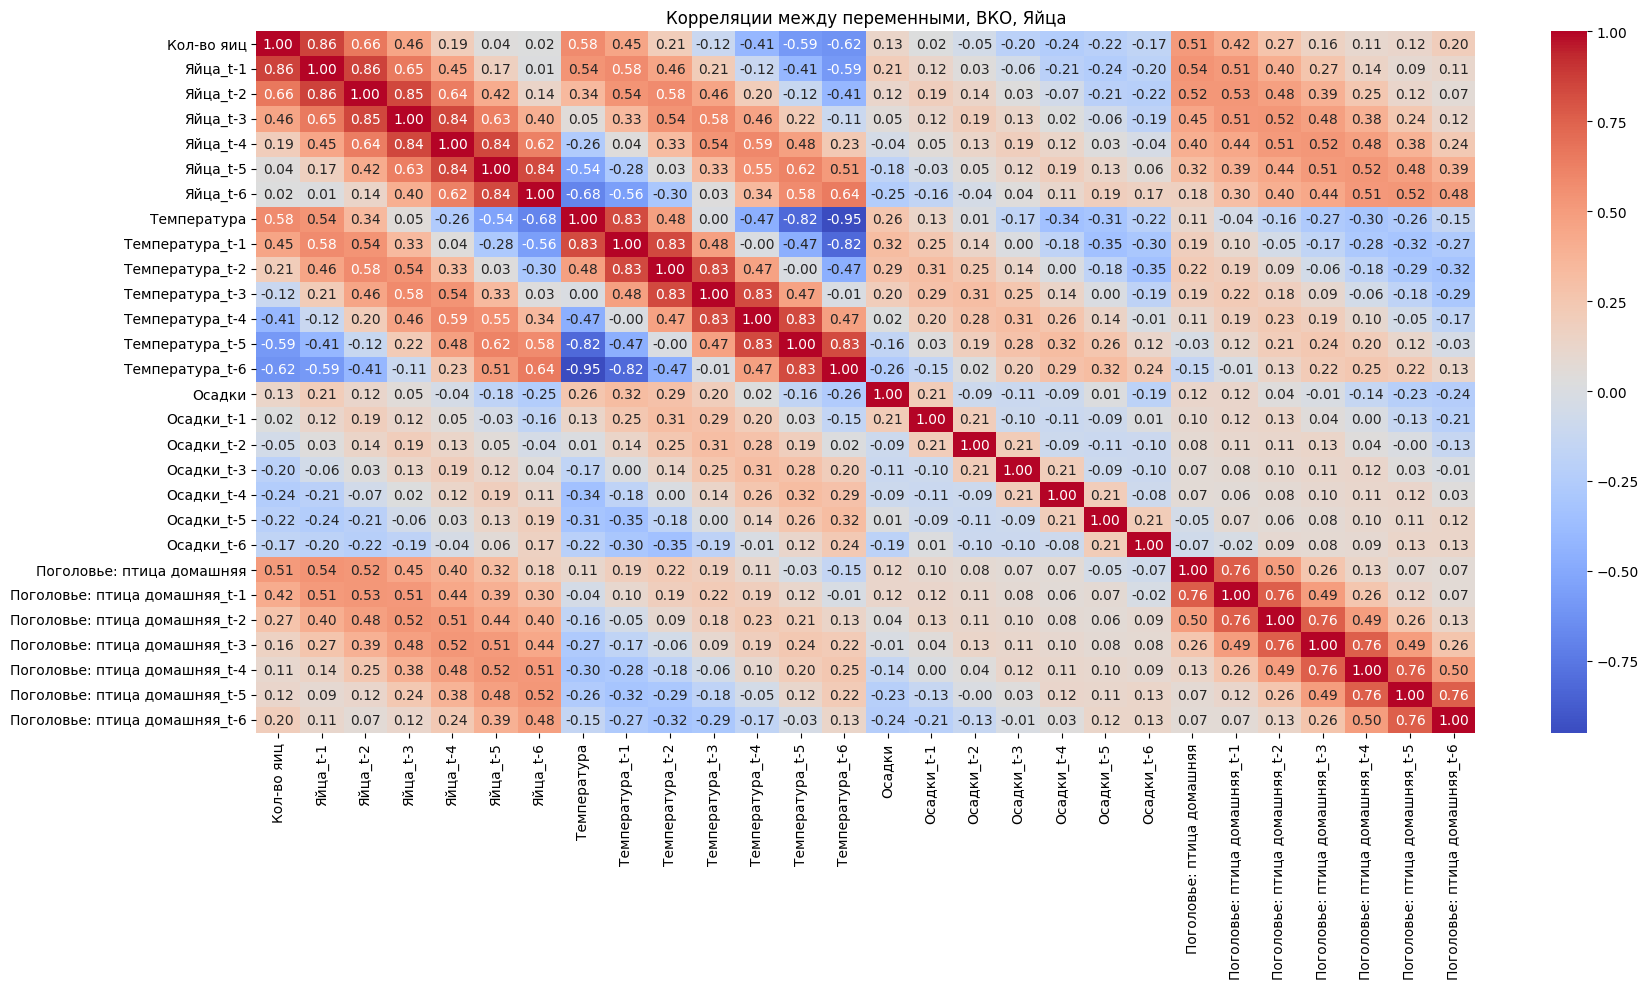

In [102]:
df_corr = df_vko_full[[col for col in df_vko_full.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –í–ö–û, –Ø–π—Ü–∞")
plt.tight_layout()
plt.show()

*–í–´–í–û–î–´ –ü–û –ö–û–†–†–ï–õ–Ø–¶–ò–ò*

In [103]:
# Set your target variable
target_var = "–ö–æ–ª-–≤–æ —è–∏—Ü"

# Get correlations with the target variable
target_corr = corr_matrix[target_var].drop(target_var)  # exclude self-correlation

# Keep only features with |correlation| >= 0.5
selected_vars = target_corr[abs(target_corr) >= 0.5].index.tolist()

print("‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.5:")
print(selected_vars)

# Optionally: create new dataframe with selected variables + target
df_selected = df_vko_full[['–ü–µ—Ä–∏–æ–¥'] + selected_vars + [target_var]]
df_selected

‚úÖ –û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >= 0.5:
['–Ø–π—Ü–∞_t-1', '–Ø–π—Ü–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è']


–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –Ø–π—Ü–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  \
480 2015-01-01       NaN       NaN   -10.364516              NaN   
481 2015-02-01    6106.2       NaN    -9.839286              NaN   
482 2015-03-01    7131.1    6106.2    -4.858065              NaN   
483 2015-04-01   10886.9    7131.1     6.830000              NaN   
484 2015-05-01   11777.5   10886.9    14.774194              NaN   
..         ...       ...       ...          ...              ...   
595 2024-08-01    6088.3    7405.6    21.361290        -1.012903   
596 2024-09-01    5916.0    6088.3    10.743333         9.290000   
597 2024-10-01    5600.6    5916.0     7.209677        15.641935   
598 2024-11-01    4681.3    5600.6    -1.160000        20.903333   
599 2024-12-01    4394.2    4681.3    -8.322581        22.509677   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –ö–æ–ª-–≤–æ —è–∏—Ü  
480              NaN                  3420122.0      6106.2  
481              NaN                  3610458.0      7131.1  
482              NaN                  3643041.0     10886.9  
483              NaN                  3735974.0     11777.5  
484              NaN                  3509041.0     18897.3  
..               ...                        ...         ...  
595       -14.289655                  3620230.0      5916.0  
596        -1.012903                  3747315.0      5600.6  
597         9.290000                  3723542.0      4681.3  
598        15.641935                  3764365.0      4394.2  
599        20.903333                  3426444.0      4553.1  

[120 rows x 8 columns]

In [104]:
df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–ö–æ–ª-–≤–æ —è–∏—Ü"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data.sort_values('VIF')

Variable         VIF
6  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è    1.518450
4            –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5    4.850145
2                   –Ø–π—Ü–∞_t-2    5.921141
1                   –Ø–π—Ü–∞_t-1    6.729001
3                –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞   10.658737
5            –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6   13.935103
0                      const  107.002598

Step-by-Step Strategy to Handle High VIFs:

Sort VIFs in descending order
Drop variables one at a time, starting with the one that has the highest VIF.

Check domain relevance
Keep variables that are theoretically important or core to your hypothesis, even if VIF is high.

Evaluate correlation matrix
If two variables have high correlation with each other, and both have high VIFs, drop the one less correlated with the target.

Recalculate VIF after each drop
After dropping one variable, recalculate all VIFs. Sometimes removing just one variable significantly reduces others.

Use stepwise selection (optional)
Automated methods like backward elimination can help drop redundant predictors based on model fit and VIF thresholds.

In [105]:
df_selected = df_selected.drop(columns = ['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-6', '–Ø–π—Ü–∞_t-2'])
df_selected

–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  \
480 2015-01-01       NaN   -10.364516              NaN   
481 2015-02-01    6106.2    -9.839286              NaN   
482 2015-03-01    7131.1    -4.858065              NaN   
483 2015-04-01   10886.9     6.830000              NaN   
484 2015-05-01   11777.5    14.774194              NaN   
..         ...       ...          ...              ...   
595 2024-08-01    6088.3    21.361290        -1.012903   
596 2024-09-01    5916.0    10.743333         9.290000   
597 2024-10-01    5600.6     7.209677        15.641935   
598 2024-11-01    4681.3    -1.160000        20.903333   
599 2024-12-01    4394.2    -8.322581        22.509677   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –ö–æ–ª-–≤–æ —è–∏—Ü  
480                  3420122.0      6106.2  
481                  3610458.0      7131.1  
482                  3643041.0     10886.9  
483                  3735974.0     11777.5  
484                  3509041.0     18897.3  
..                         ...         ...  
595                  3620230.0      5916.0  
596                  3747315.0      5600.6  
597                  3723542.0      4681.3  
598                  3764365.0      4394.2  
599                  3426444.0      4553.1  

[120 rows x 6 columns]

In [106]:
df_vif = df_selected[[col for col in df_selected.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna().copy()
X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–ö–æ–ª-–≤–æ —è–∏—Ü"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data.sort_values('VIF')

Variable        VIF
4  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è   1.509132
1                   –Ø–π—Ü–∞_t-1   2.100933
3            –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5   3.091215
2                –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞   3.603913
0                      const  96.956611

In [107]:
df_selected = df_selected.dropna().copy()
df_selected

–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  \
485 2015-06-01   18897.3    20.636667       -10.364516   
486 2015-07-01   15488.8    21.306452        -9.839286   
487 2015-08-01   15488.8    19.096774        -4.858065   
488 2015-09-01   15028.2    11.086667         6.830000   
489 2015-10-01   13342.8     7.603226        14.774194   
..         ...       ...          ...              ...   
595 2024-08-01    6088.3    21.361290        -1.012903   
596 2024-09-01    5916.0    10.743333         9.290000   
597 2024-10-01    5600.6     7.209677        15.641935   
598 2024-11-01    4681.3    -1.160000        20.903333   
599 2024-12-01    4394.2    -8.322581        22.509677   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –ö–æ–ª-–≤–æ —è–∏—Ü  
485                  4023589.0     15488.8  
486                  4177986.0     15488.8  
487                  4121550.0     15028.2  
488                  3945097.0     13342.8  
489                  3901846.0     10493.2  
..                         ...         ...  
595                  3620230.0      5916.0  
596                  3747315.0      5600.6  
597                  3723542.0      4681.3  
598                  3764365.0      4394.2  
599                  3426444.0      4553.1  

[115 rows x 6 columns]

### Models

#### –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [108]:
# def forward_selection(data, target, candidate_features, criterion="adj_r2"):
#     remaining = list(candidate_features)
#     selected = []
#     best_score = -float("inf")
#     best_model = None

#     while remaining:
#         scores_with_candidates = []
#         for candidate in remaining:
#             features = selected + [candidate]
#             X = sm.add_constant(data[features])
#             y = data[target]
#             model = sm.OLS(y, X).fit()

#             if criterion == "adj_r2":
#                 score = model.rsquared_adj
#             elif criterion == "aic":
#                 score = -model.aic  # negative for maximizing
#             else:
#                 raise ValueError("criterion must be 'adj_r2' or 'aic'")

#             scores_with_candidates.append((score, candidate, model))

#         scores_with_candidates.sort(reverse=True)
#         best_new_score, best_candidate, model = scores_with_candidates[0]

#         if best_new_score > best_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             best_score = best_new_score
#             best_model = model
#             print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
#         else:
#             print("‚õî No improvement. Stopping.")
#             break

#     return selected, best_model


In [109]:
# Define target and features
y = df_selected["–ö–æ–ª-–≤–æ —è–∏—Ü"]
X = df_selected.drop(columns=["–ü–µ—Ä–∏–æ–¥", "–ö–æ–ª-–≤–æ —è–∏—Ü"])

# Add constant term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             –ö–æ–ª-–≤–æ —è–∏—Ü   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           8.39e-42
Time:                        20:19:42   Log-Likelihood:                -1025.1
No. Observations:                 115   AIC:                             2060.
Df Residuals:                     110   BIC:                             2074.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const         

In [110]:
df_selected

–ü–µ—Ä–∏–æ–¥  –Ø–π—Ü–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-5  \
485 2015-06-01   18897.3    20.636667       -10.364516   
486 2015-07-01   15488.8    21.306452        -9.839286   
487 2015-08-01   15488.8    19.096774        -4.858065   
488 2015-09-01   15028.2    11.086667         6.830000   
489 2015-10-01   13342.8     7.603226        14.774194   
..         ...       ...          ...              ...   
595 2024-08-01    6088.3    21.361290        -1.012903   
596 2024-09-01    5916.0    10.743333         9.290000   
597 2024-10-01    5600.6     7.209677        15.641935   
598 2024-11-01    4681.3    -1.160000        20.903333   
599 2024-12-01    4394.2    -8.322581        22.509677   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ø—Ç–∏—Ü–∞ –¥–æ–º–∞—à–Ω—è—è  –ö–æ–ª-–≤–æ —è–∏—Ü  
485                  4023589.0     15488.8  
486                  4177986.0     15488.8  
487                  4121550.0     15028.2  
488                  3945097.0     13342.8  
489                  3901846.0     10493.2  
..                         ...         ...  
595                  3620230.0      5916.0  
596                  3747315.0      5600.6  
597                  3723542.0      4681.3  
598                  3764365.0      4394.2  
599                  3426444.0      4553.1  

[115 rows x 6 columns]

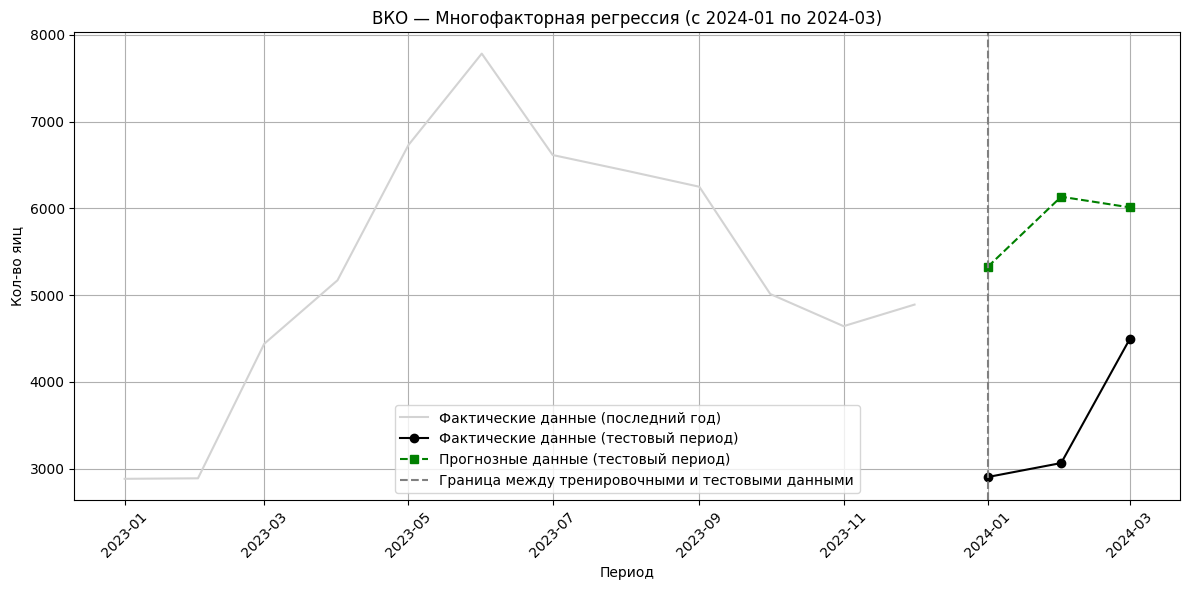

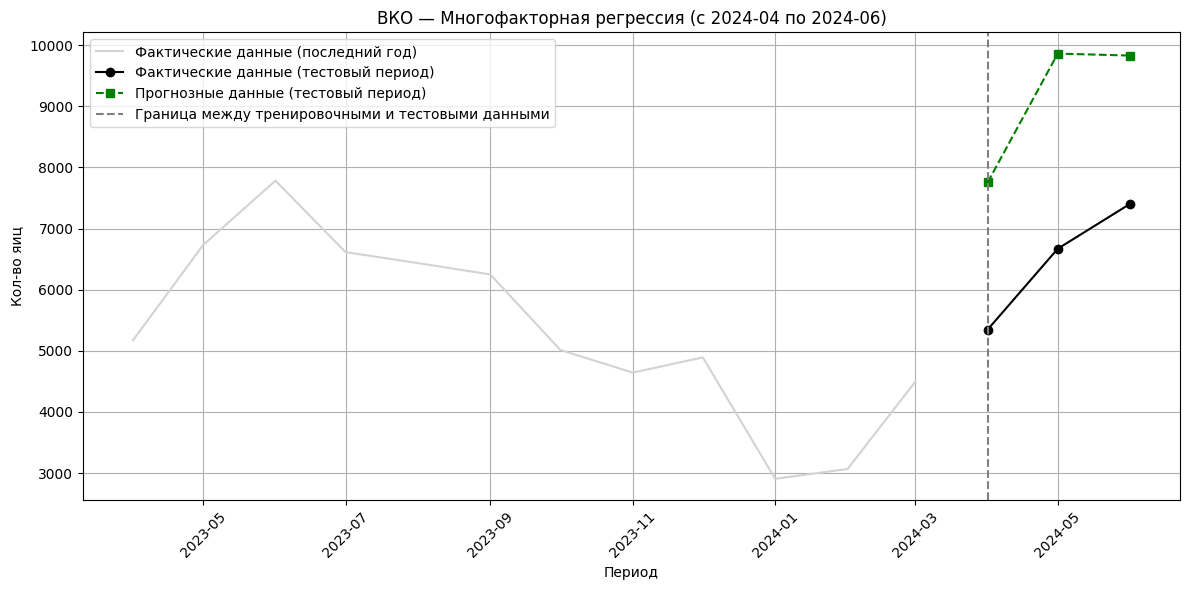

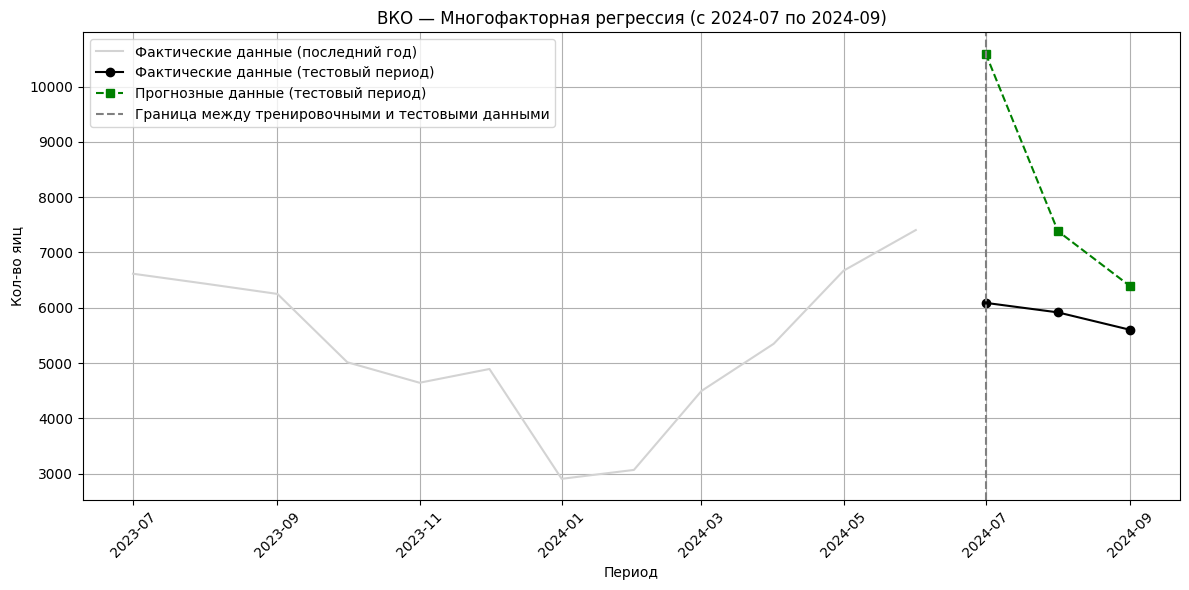

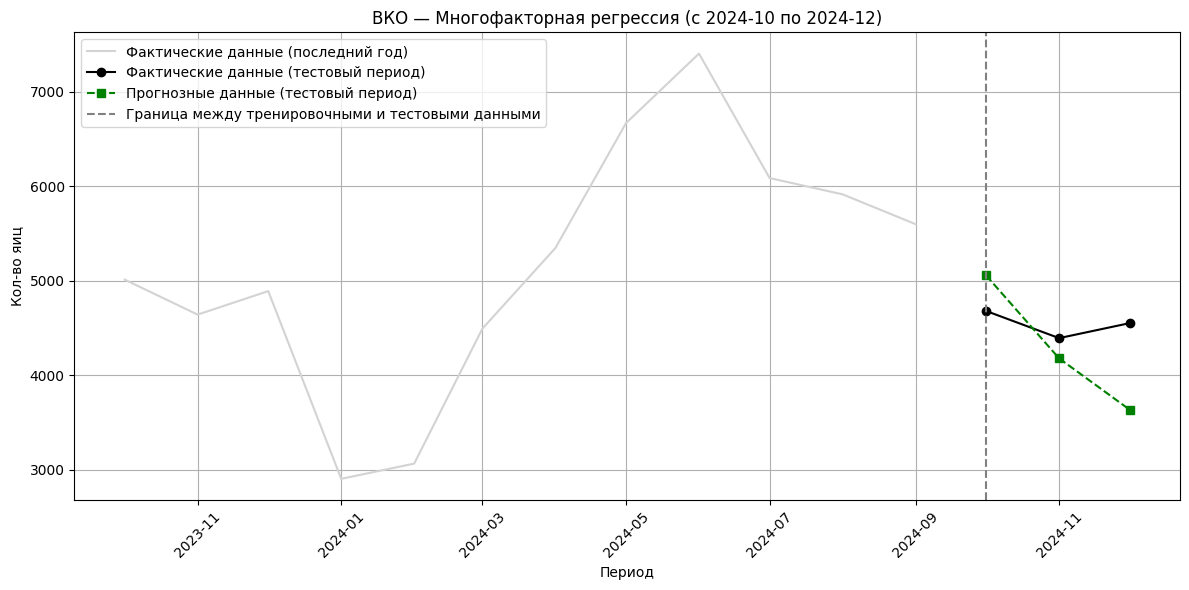

In [111]:
df = df_selected.sort_values("–ü–µ—Ä–∏–æ–¥").copy()

target = "–ö–æ–ª-–≤–æ —è–∏—Ü"
features = [col for col in df_selected.columns if col not in ['–ü–µ—Ä–∏–æ–¥', '–ö–æ–ª-–≤–æ —è–∏—Ü']]

results = []

# Define 4 rolling test sets for 2024
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [112]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-01 to 2024-03  2421.263262  2336.137495  72.408296
1  2024-04 to 2024-06  2701.092500  2676.191893  41.894262
2  2024-07 to 2024-09  2775.833890  2256.055711  37.666281
3  2024-10 to 2024-12   585.408147   502.451280  11.016811
4             Average  2120.899450  1942.709095  40.746413


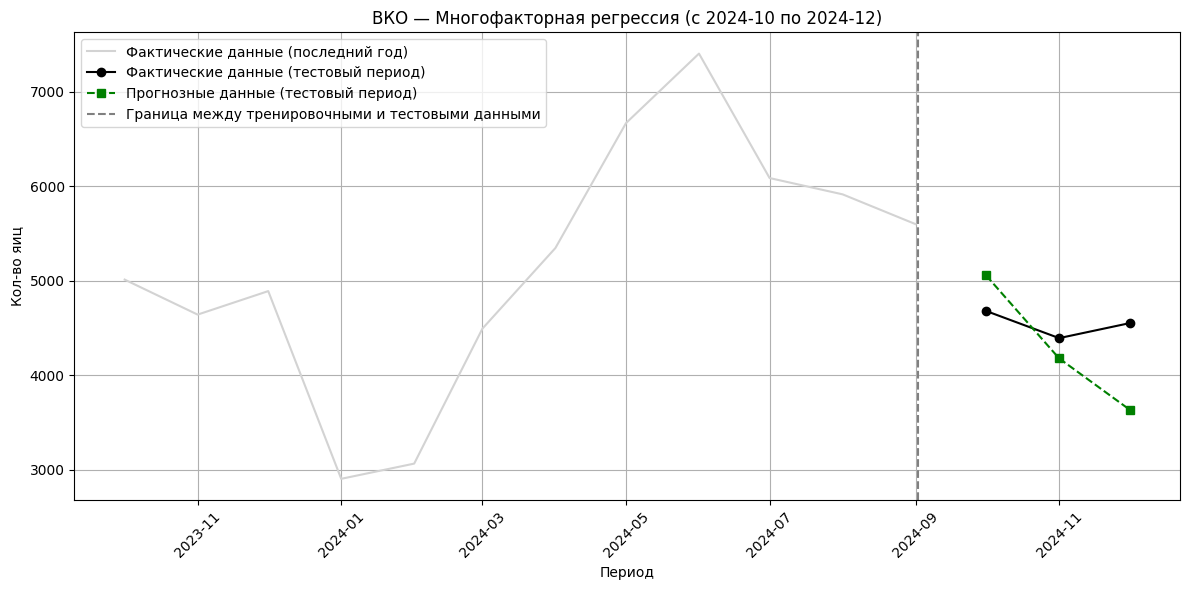

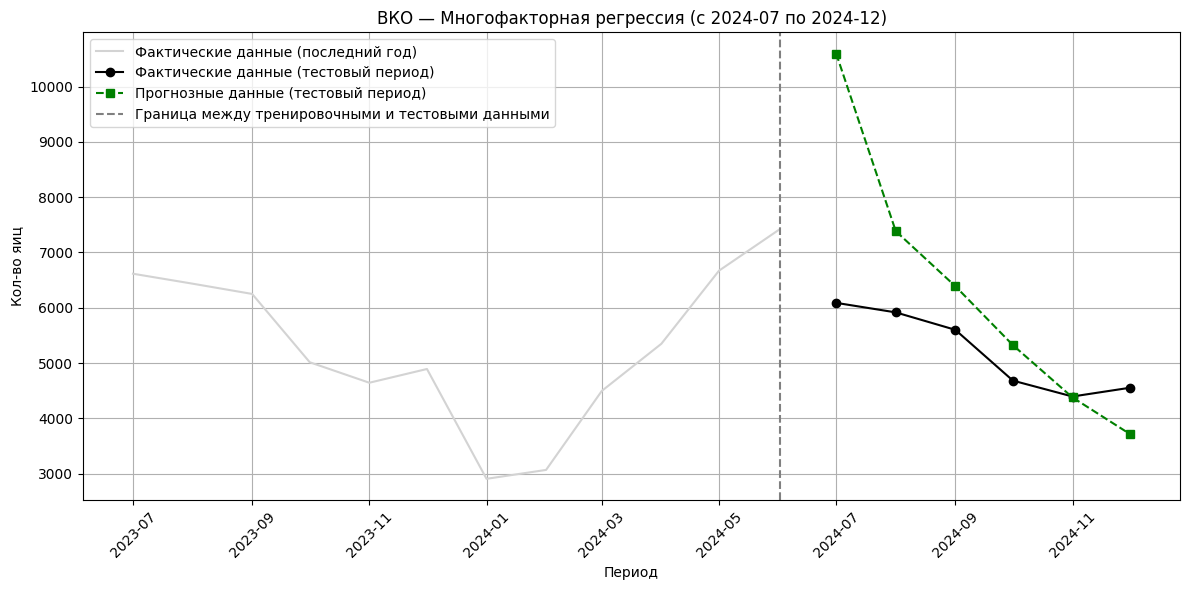

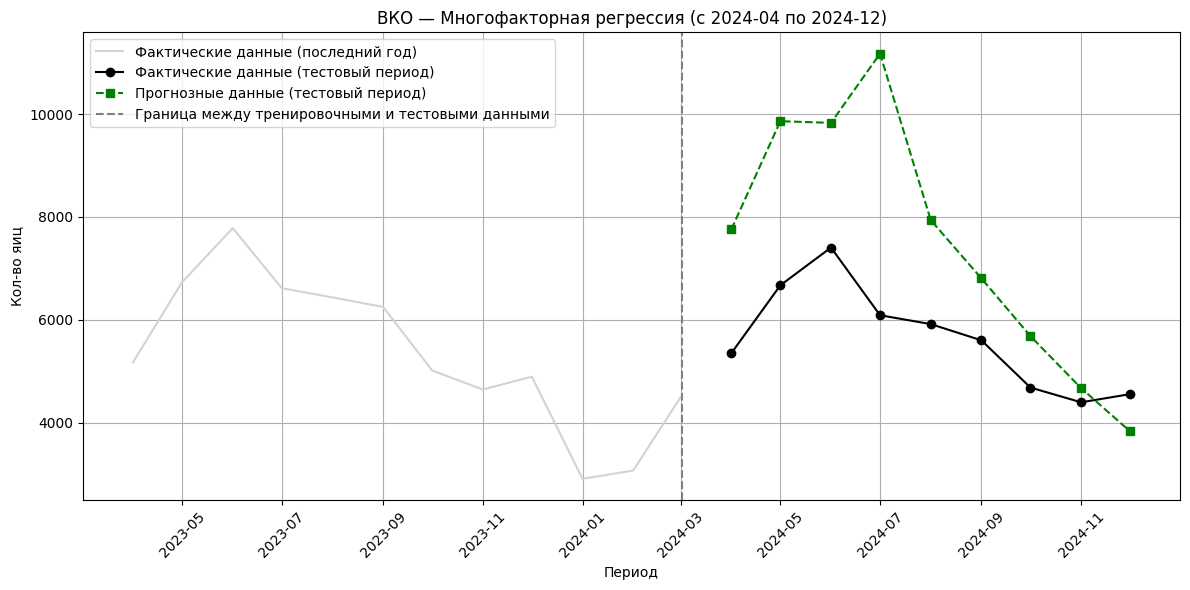

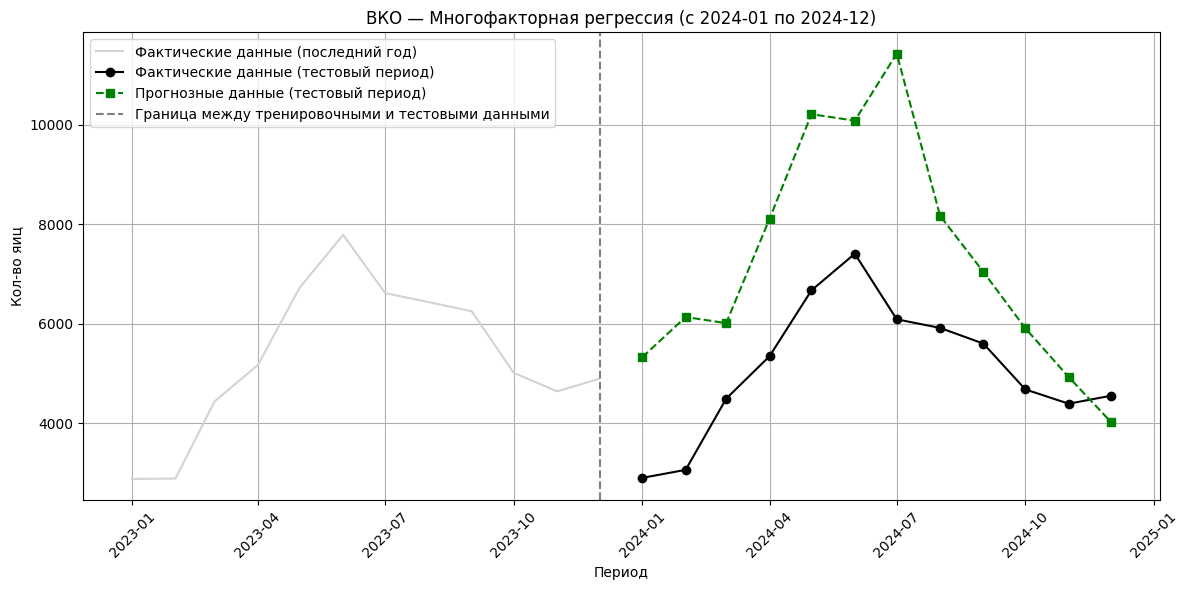

In [113]:
results = []

# Define 4 rolling test sets for 2024
horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    X_train = sm.add_constant(train_df[features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        # "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [114]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-10 to 2024-12   585.408147   502.451280  11.016811
1  2024-07 to 2024-12  2009.684493  1377.741244  24.255573
2  2024-04 to 2024-12  2471.175754  2038.890956  34.289275
3  2024-01 to 2024-12  2621.942459  2273.185591  46.583281
4             Average  1922.052713  1548.067268  29.036235


#### SARIMA (auto-arima)

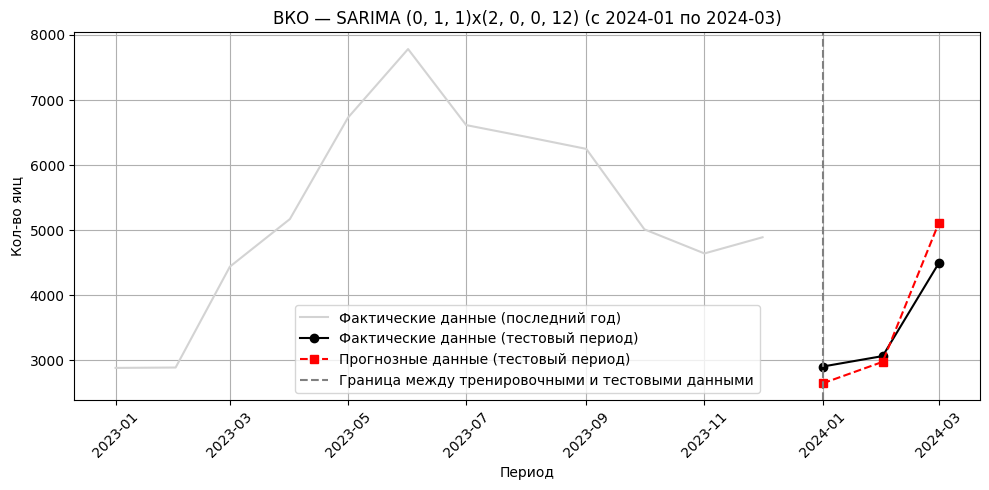

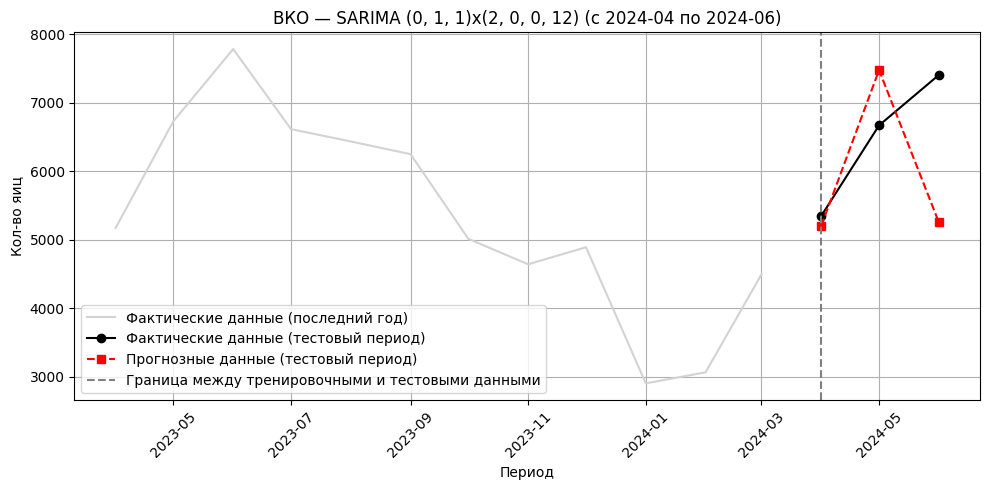

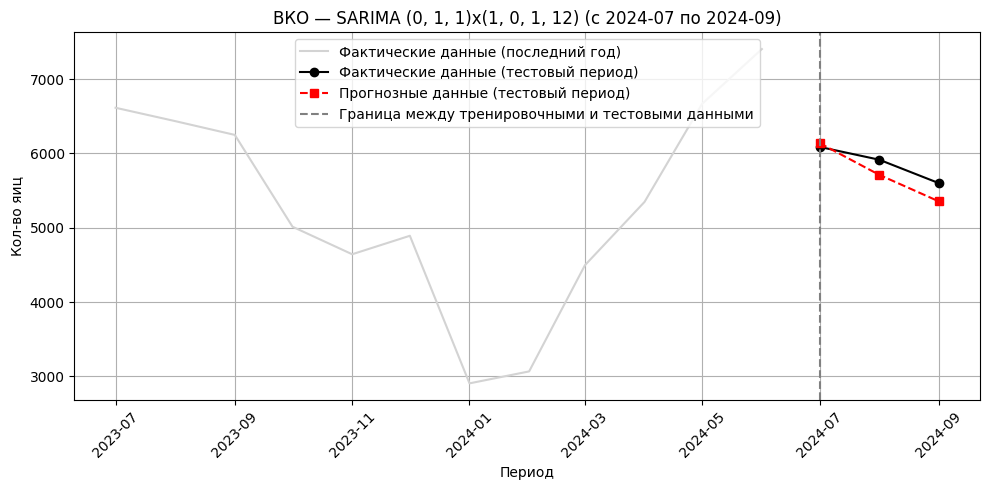

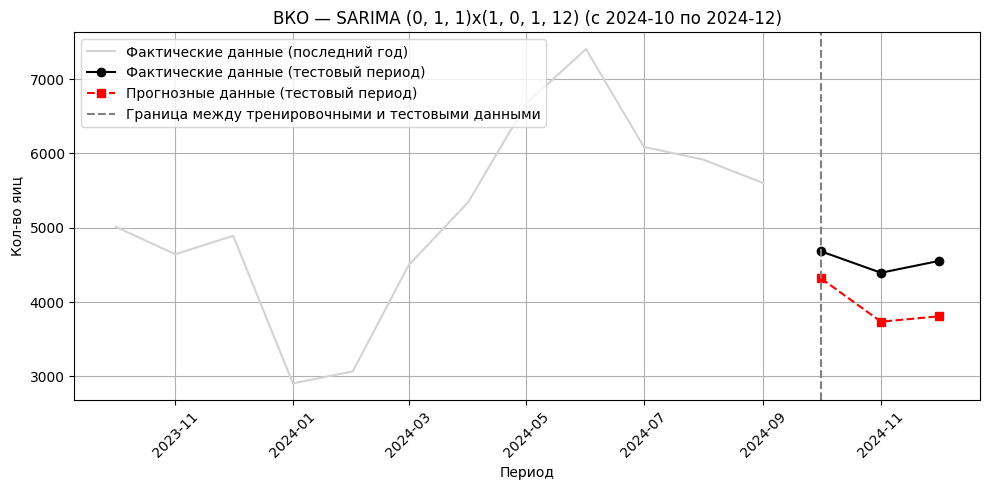

In [115]:
results = []

# –û–ø—Ä–µ–¥–µ–ª–∏–º 4 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞ 3 –º–µ—Å—è—Ü–∞
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=3)
        forecast = pd.Series(forecast).reset_index(drop=True)


        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {test_start.strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        # print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [116]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE   MAPE (%) SARIMA order  \
0  2024-01 to 2024-03   389.873110   321.499060   8.506548    (0, 1, 1)   
1  2024-04 to 2024-06  1328.504212  1034.302780  14.619550    (0, 1, 1)   
2  2024-07 to 2024-09   186.408804   166.632810   2.886429    (0, 1, 1)   
3  2024-10 to 2024-12   611.651197   589.518452  13.049027    (0, 1, 1)   
4             Average   629.109331   527.988275   9.765388          NaN   

  Seasonal order  
0  (2, 0, 0, 12)  
1  (2, 0, 0, 12)  
2  (1, 0, 1, 12)  
3  (1, 0, 1, 12)  
4            NaN  


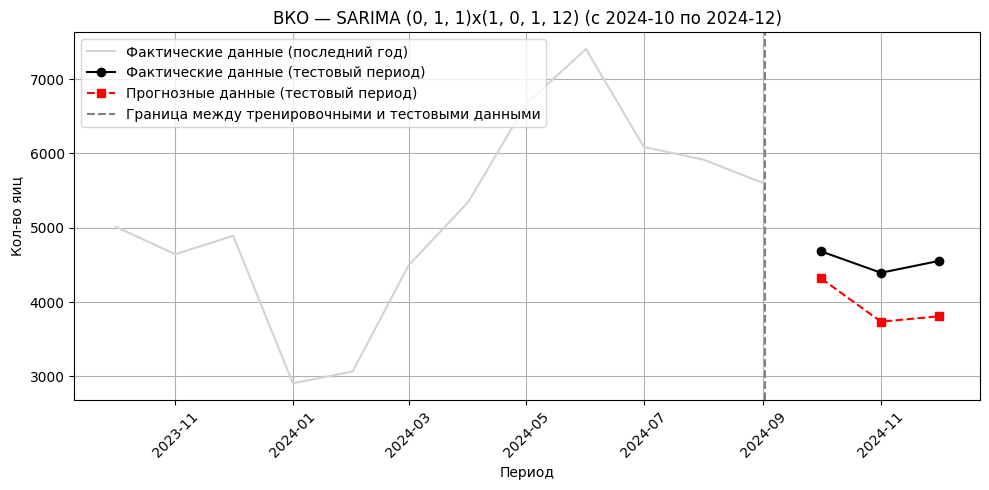

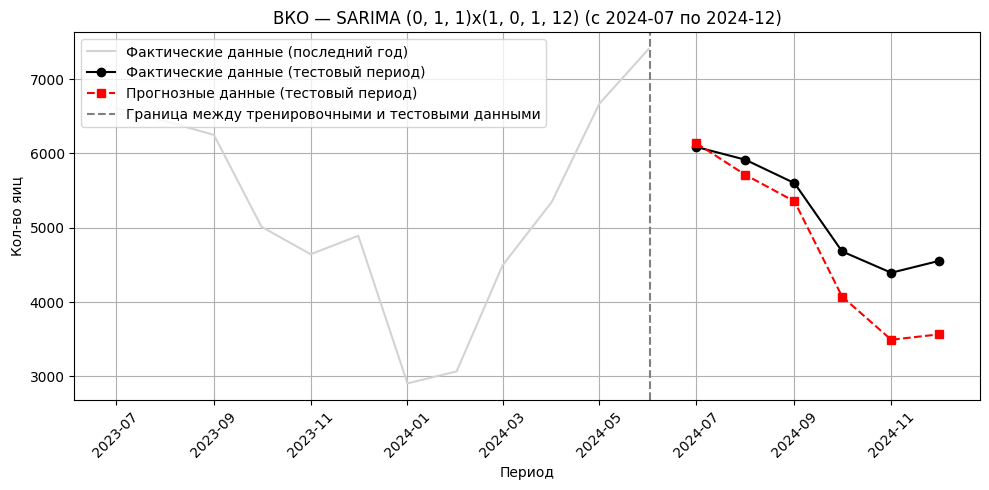

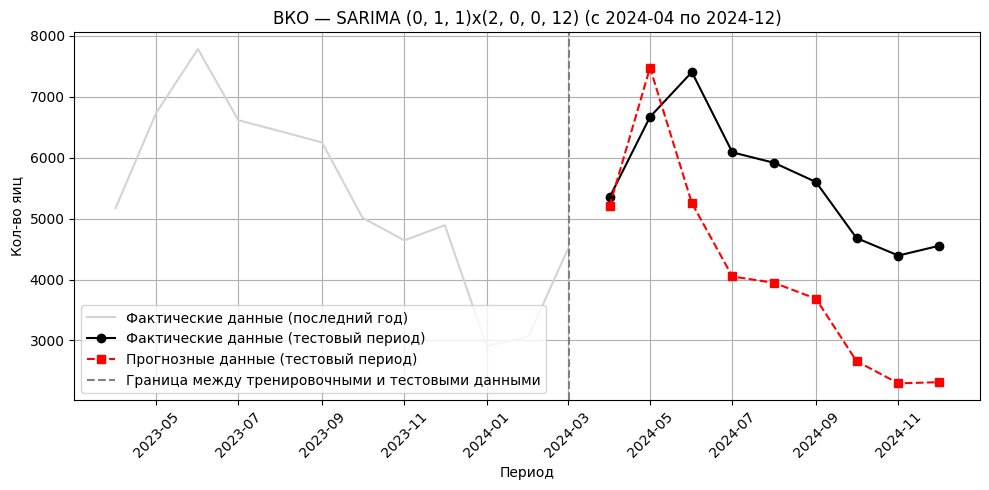

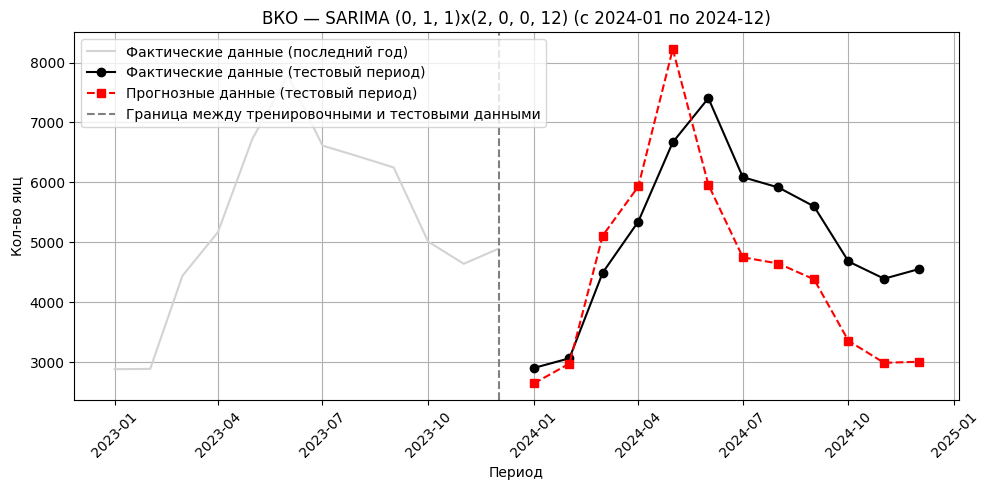

In [117]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)
    
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=horizon)
        forecast = pd.Series(forecast).reset_index(drop=True)

        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [118]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE   MAPE (%) SARIMA order  \
0  2024-10 to 2024-12   611.651197   589.518452  13.049027    (0, 1, 1)   
1  2024-07 to 2024-12   614.362082   499.745869  10.647697    (0, 1, 1)   
2  2024-04 to 2024-12  1840.607022  1709.207317  31.654650    (0, 1, 1)   
3  2024-01 to 2024-12  1164.955586  1053.532910  19.877802    (0, 1, 1)   
4             Average  1057.893972   963.001137  18.807294          NaN   

  Seasonal order  
0  (1, 0, 1, 12)  
1  (1, 0, 1, 12)  
2  (2, 0, 0, 12)  
3  (2, 0, 0, 12)  
4            NaN  


#### SARIMAX

In [ ]:
results = []

start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 1, 1),
            seasonal_order=(1, 0, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=3, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMAX (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [ ]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)



In [ ]:
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:
    # test_start = pd.to_datetime(start)
    # test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[features].reset_index(drop=True)
    exog_test = test_df[features].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(1, 0, 0),
            seasonal_order=(1, 0, 0, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=horizon, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMAX (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [ ]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)

#### Prophet

20:25:39 - cmdstanpy - INFO - Chain [1] start processing
20:25:40 - cmdstanpy - INFO - Chain [1] done processing


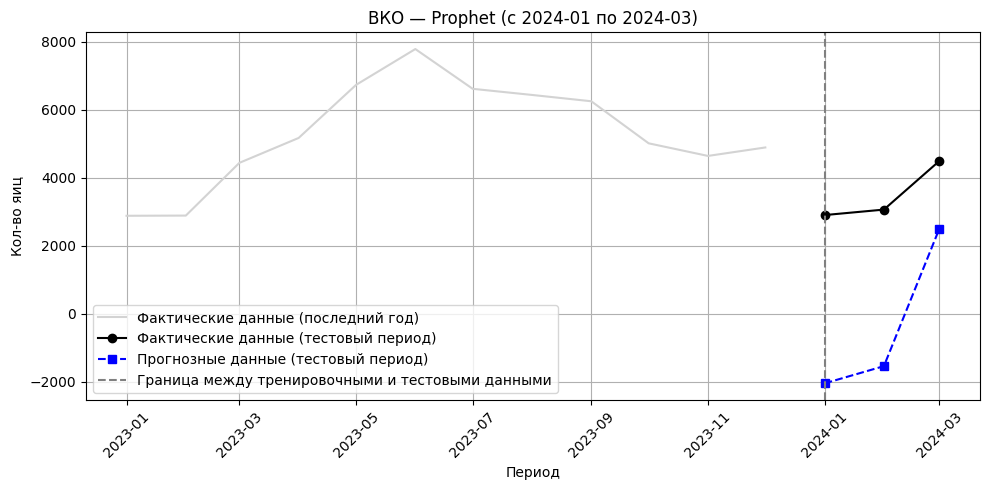

20:25:40 - cmdstanpy - INFO - Chain [1] start processing
20:25:40 - cmdstanpy - INFO - Chain [1] done processing


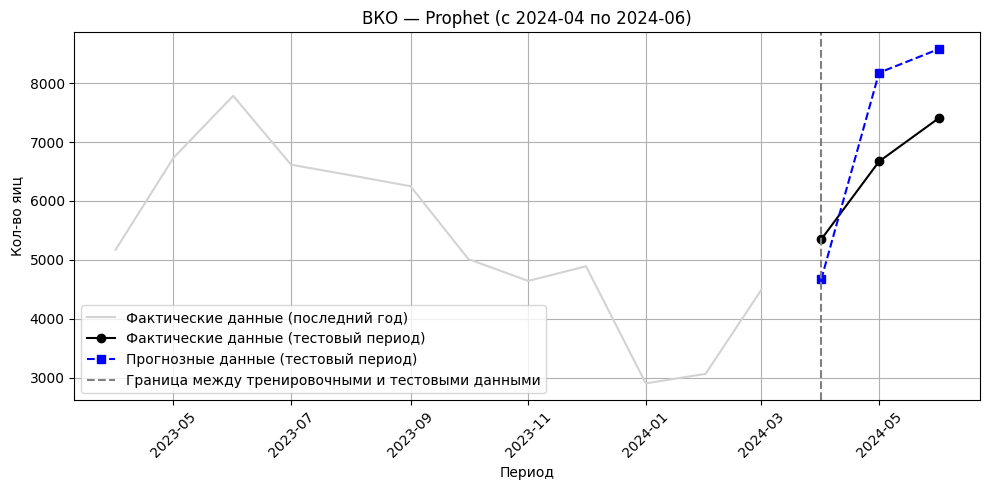

20:25:41 - cmdstanpy - INFO - Chain [1] start processing
20:25:41 - cmdstanpy - INFO - Chain [1] done processing


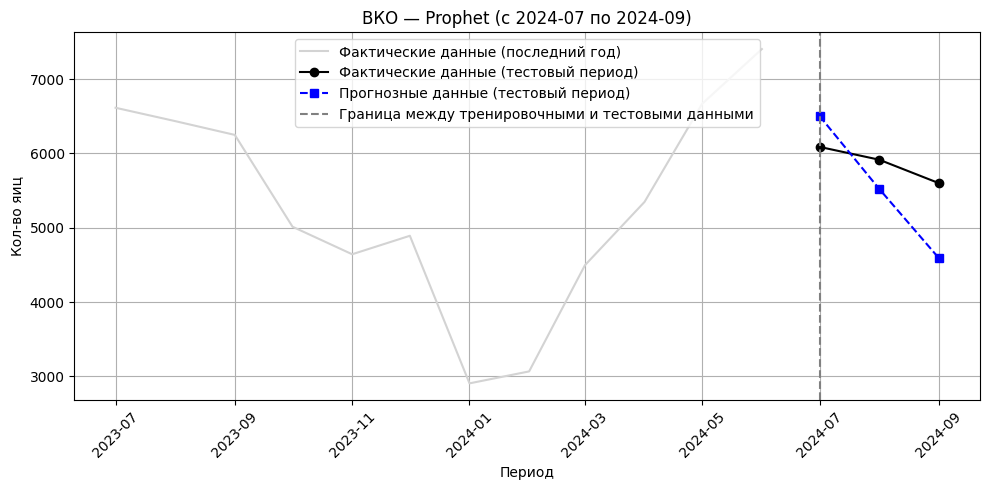

20:25:41 - cmdstanpy - INFO - Chain [1] start processing
20:25:41 - cmdstanpy - INFO - Chain [1] done processing


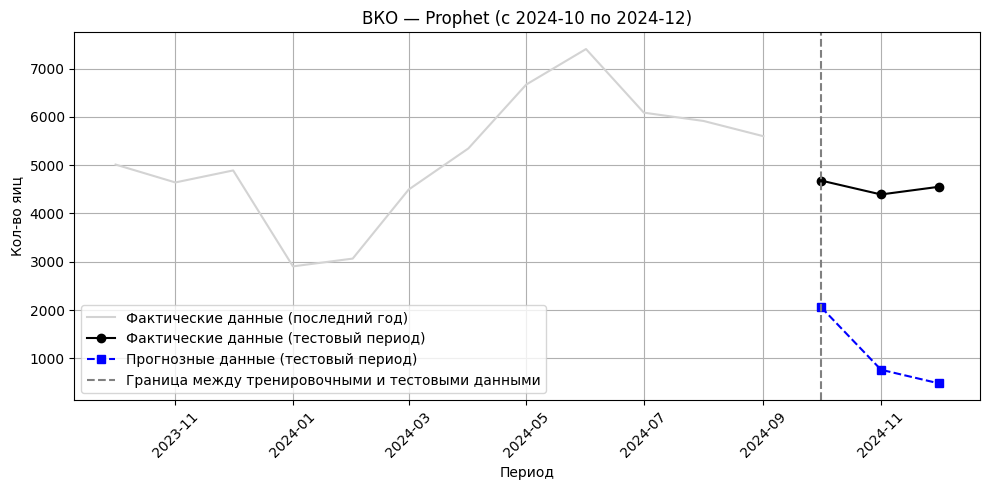

In [121]:
results = []

# Define 4 test periods
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Train/test split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Initialize Prophet
    model = Prophet()

    # Optional: add regressors
    # model.add_regressor("–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1")
    # prophet_train["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = train_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values
    # prophet_test["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"] = test_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1"].values

    # Fit
    model.fit(prophet_train)

    # Create future dataframe
    future = model.make_future_dataframe(periods=3, freq="M")
    forecast = model.predict(future)
# forecast
# prophet_test

    # Extract forecast for test period only
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî Prophet (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [122]:
results_df = pd.DataFrame(results)
avg = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg])], ignore_index=True)
print(results_df)

          Test period         RMSE          MAE    MAPE (%)
0  2024-01 to 2024-03  4065.451093  3845.450934  121.516904
1  2024-04 to 2024-06  1169.143503  1118.750112   17.029715
2  2024-07 to 2024-09   669.639939   605.814357   10.494227
3  2024-10 to 2024-12  3494.360297  3441.506618   76.020870
4             Average  2349.648708  2252.880505   56.265429


20:25:56 - cmdstanpy - INFO - Chain [1] start processing
20:25:56 - cmdstanpy - INFO - Chain [1] done processing


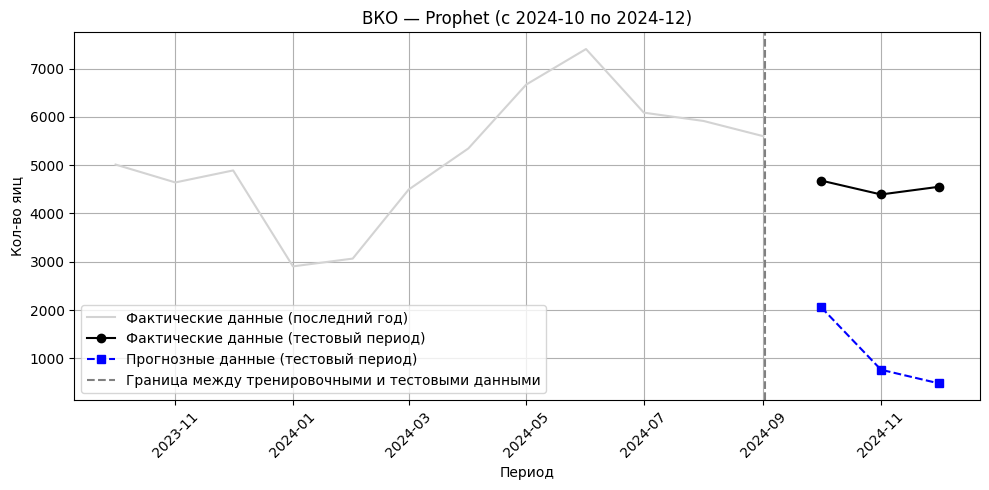

20:25:57 - cmdstanpy - INFO - Chain [1] start processing
20:25:57 - cmdstanpy - INFO - Chain [1] done processing


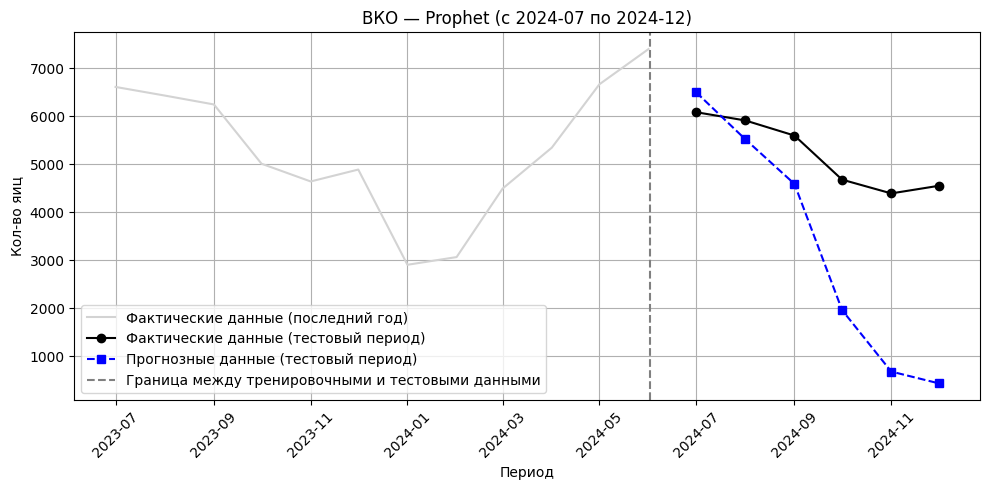

20:25:57 - cmdstanpy - INFO - Chain [1] start processing
20:25:57 - cmdstanpy - INFO - Chain [1] done processing


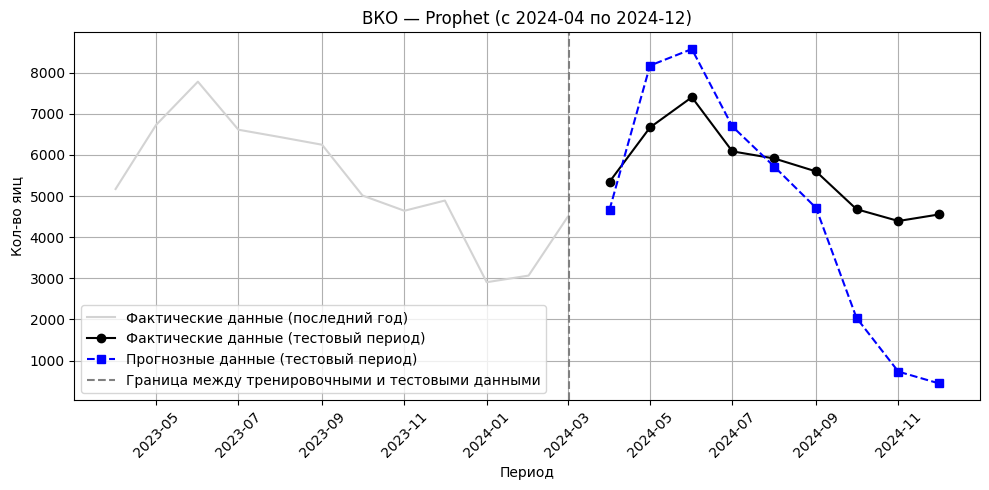

20:25:58 - cmdstanpy - INFO - Chain [1] start processing
20:25:58 - cmdstanpy - INFO - Chain [1] done processing


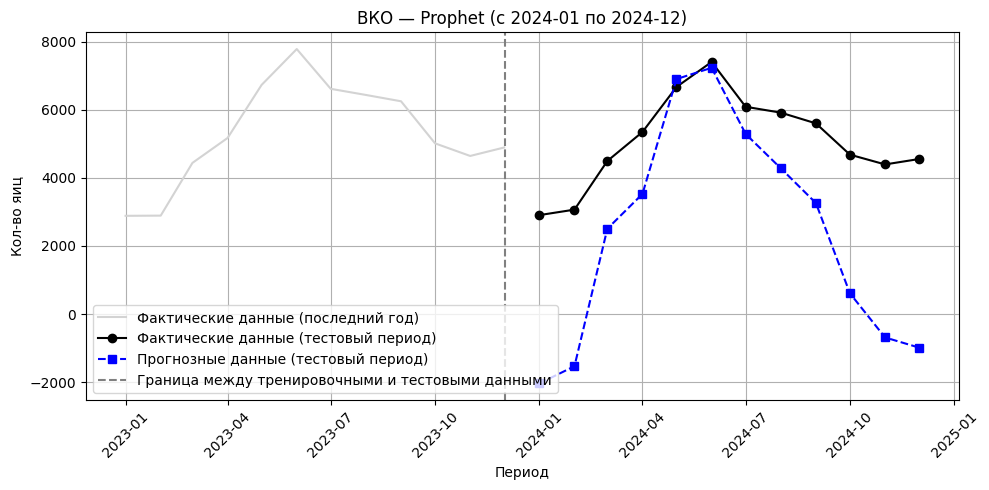

In [123]:
horizons = [3, 6, 9, 12]
results = []

for horizon in horizons:

    # Define train/test split
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Fit Prophet
    model = Prophet()
    model.fit(prophet_train)

    # Forecast
    future = model.make_future_dataframe(periods=horizon, freq="M")
    forecast = model.predict(future)

    # Extract matching forecasted months
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî Prophet (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–ö–æ–ª-–≤–æ —è–∏—Ü")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [124]:
# Summary table
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)

          Test period         RMSE          MAE   MAPE (%)
0  2024-10 to 2024-12  3494.360297  3441.506618  76.020870
1  2024-07 to 2024-12  2567.365802  2062.735888  44.117537
2  2024-04 to 2024-12  2175.295958  1718.062058  34.478103
3  2024-01 to 2024-12  3352.890436  2769.424072  67.611291
4                 NaN  2897.478123  2497.932159  55.556950


strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation